# Digital Circuits

## Boolean algebra

## Schedule:

- Boolean algebra
- Axiomatic definition
- Logic gates
- Postulates and theorems
- Boolean functions
- Logic diagrams with gates
- Simplification of literals or algebraic manipulation
- Complementing a function
- **Canonical and normalized forms**
- Minimum and maximum terms
- Karnaugh map

In [7]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
colab_path = '/content/drive/MyDrive/Colab Notebooks/digilab/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Canonical and normalized forms

They allow a logical function to be expressed as sums of products or as Sum of Products (SOP) or Product of Sums (POS) forms.

- Minimum terms or mini-terms

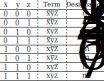

In [9]:
from IPython.display import SVG
SVG(valid_path + 'bool09.svg')

- Maximum terms or max-terms

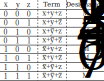

In [10]:
SVG(valid_path + 'bool10.svg')

- Mini-term $\longrightarrow$ Complement $\longrightarrow$ Max-term

A Boolean function can be expressed algebraically from a truth table. This truth table assigns a minterm and a maxterm to each row, so the function can be expressed using them.

In [11]:
SVG(valid_path + 'bool11.svg')

$$\begin{array}{c}
\sum m_{j}=1\\
\prod M_{j}=0
\end{array}$$

$$F_{5}=m_{1}+m_{4}+m_{7}=\overline{x}\overline{y}z+x\overline{y}\overline{z}+xyz$$

$$F_{5}=M_{0}\cdot M_{2}\cdot M_{3}\cdot M_{5}\cdot M_{6}=\left(x+y+z\right)\cdot\left(x+\overline{y}+z\right)\cdot\left(x+\overline{y}+\overline{z}\right)\cdot\left(\overline{x}+y+\overline{z}\right)\cdot\left(\overline{x}+\overline{y}+z\right)
$$

It can also be calculated as complement of minterms = 0:

$$\overline{F_{5}}=m_{0}+m_{2}+m_{3}+m_{5}+m_{6}$$

### Example

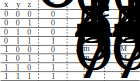

In [12]:
SVG(valid_path + 'bool12.svg')

$$F_{6}=m_{3}+m_{5}+m_{6}+m_{7}=M_{0}\cdot M_{1}\cdot M_{2}\cdot M_{4}$$

$$F_{6}=\left(\overline{x}yz\right)+\left(x\overline{y}z\right)+\left(xy\overline{z}\right)+\left(xyz\right)=\left(x+y+z\right)\cdot\left(x+y+\overline{z}\right)\cdot\left(x+\overline{y}+z\right)\cdot\left(\overline{x}+y+z\right)
$$

Any Boolean function can be expressed as a sum of min terms or as a product of max terms. These are the two canonical forms.

### Example

Express function $F_{7}=A+\overline{B}C$ as the sum of min terms.

#### Solution

For the first term:

$$
A=A\left(B+\overline{B}\right)=AB+A\overline{B}$$

There's still one variable missing:

$$A=AB+A\overline{B}=AB\left(C+\overline{C}\right)+A\overline{B}\left(C+\overline{C}\right)=ABC+AB\overline{C}+A\overline{B}C+A\overline{B}\overline{C}
$$

For the second term:

$$\overline{B}C=\overline{B}C\left(A+\overline{A}\right)=A\overline{B}C+\overline{A}\overline{B}C$$

Combining the two terms:

$$F_{7}=ABC+AB\overline{C}+A\overline{B}C+A\overline{B}\overline{C}+A\overline{B}C+\overline{A}\overline{B}C$$

As $x+x=x$, then we remove one of the $A\overline{B}C$:

$$F_{7}=ABC+AB\overline{C}+A\overline{B}C+A\overline{B}\overline{C}+\overline{A}\overline{B}C$$

This corresponds to the min-terms:

$$F_{7}=\overline{A}\overline{B}C+A\overline{B}\overline{C}+A\overline{B}C+AB\overline{C}+ABC=m_{1}+m_{4}+m_{5}+m_{6}+m_{7}$$

$$F_{7}\left(A,B,C\right)=\sum\left(1,4,5,6,7\right)$$

### Workshop

- Express $F_{7}=A+\overline{B}C$ as a product of Max terms.
- Then use Morgan to demonstrate the equality between the two results.
- Actually there are $2^{2^{n}}$ binary functions, that is, 16. Of these we have only talked about two: AND and OR, investigate the other 14.

# Laboratory 5: Canonical and Normalized Forms

## Goals:


*   Understand the concept and application of canonical and normalized forms in Boolean algebra.
*   Identify and construct minimum and maximum terms from Boolean expressions.
*   Convert Boolean expressions to their canonical forms using Python.
*   Visualize and analyze Boolean expressions in both Sum of Products (SOP) and Product of Sums (POS) forms.

## Theoretical Introduction:


Research and document in a summarized form (maximum one page) the following concepts:

*   Canonical forms in Boolean algebra: Definition and types (Sum of Products - SOP and Product of Sums - POS).
*   Normalized forms: Difference between canonical and minimal forms.
*   Minimum terms (minterms) and maximum terms (maxterms): Definitions and applications.
*   Methods for converting Boolean expressions into canonical forms.

## Hands-on activity:

### Activity 1: Identifying Minimum and Maximum Terms

Import necessary Python libraries to manipulate Boolean expressions and visualize results.

In [13]:
from sympy import symbols
from sympy.logic.boolalg import Or, And, Not, truth_table

Define a Python function to identify minterms and maxterms from a truth table.

In [14]:
# Función para generar minterms
def generate_minterms(expression, variables):
    minterms = []
    # Crear la tabla de verdad para la expresión
    for row in truth_table(expression, variables):
        input_combination = [int(val) for val in row[0]]  # Convertir los valores de entrada a enteros
        output = row[1]
        # Generar el número decimal equivalente a la combinación de entrada
        if output:  # Si la salida es True
            index = sum(val * (2 ** idx) for idx, val in enumerate(reversed(input_combination)))
            minterms.append(index)
    return minterms

# Función para generar maxterms
def generate_maxterms(expression, variables):
    maxterms = []
    # Crear la tabla de verdad para la expresión
    for row in truth_table(expression, variables):
        input_combination = [int(val) for val in row[0]]  # Convertir los valores de entrada a enteros
        output = row[1]
        # Generar el número decimal equivalente a la combinación de entrada
        if not output:  # Si la salida es False
            index = sum(val * (2 ** idx) for idx, val in enumerate(reversed(input_combination)))
            maxterms.append(index)
    return maxterms

Use these functions to list the minterms and maxterms for various expressions (at least **5 different ones**, verifying the veracity of results).

Example:

$$A+\bar{B}\cdot C$$

In [15]:
# Definir las variables booleanas
A, B, C = symbols('A B C')

# Expresión Booleana corregida
expression_1 = Or(A, And(Not(B), C))

# Calcular minterms y maxterms
minterms_1 = generate_minterms(expression_1, [A, B, C])
maxterms_1 = generate_maxterms(expression_1, [A, B, C])

print("Minterms for expression 1:", minterms_1)
print("Maxterms for expression 1:", maxterms_1)

Minterms for expression 1: [1, 4, 5, 6, 7]
Maxterms for expression 1: [0, 2, 3]


### Activity 2: Simulation of functions

Using the codes studied in all the laboratories to date, find by simulation the truth table of **F**5:

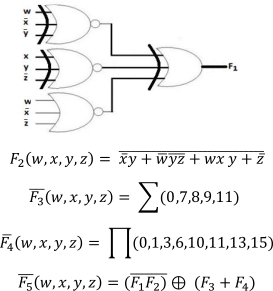

In [16]:
SVG(valid_path + 'bool13.svg')

**Note**: For reference, the truth table of the three-input XOR gate is as follows:

$$
\begin{array}{|c|c|c|c|}
\hline
A & B & C & \text{XOR}(A, B, C) \\
\hline
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 \\
1 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 \\
\hline
\end{array}
$$
